# Analyzing QUBICC Data

**For Figure 1 of the paper**

In [17]:
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import importlib
import matplotlib
import matplotlib.pyplot as plt

# For psyplot
import psyplot.project as psy
import matplotlib as mpl
# %matplotlib inline
# %config InlineBackend.close_figures = False

psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [10., 8.]

In [2]:
# path = '/pf/b/b309170/my_work/QUBICC/data_var_vertinterp/cl/'

# file = 'int_var_hc2_02_p1m_cl_ml_20041110T010000Z.nc'

In [3]:
path = '/pf/b/b309170/my_work/QUBICC/'
file_cg = 'data_hor_interp/hc2_02_p1m_cl_ml_20041105T150000Z.nc'
file_orig = 'some_orig_data/hc2_02_p1m_cl_ml_20041105T150000Z.nc'

#### Question 1: Does the coarse-graining look right?

Of horizontal coarse-graining (psyplot): <br>

If you get the error 'ValueError: Can only plot 2-dimensional data!', then you need to use cdo setgrid on the file first.

**'height' 40 is layer 41 counting from 1 to 91**

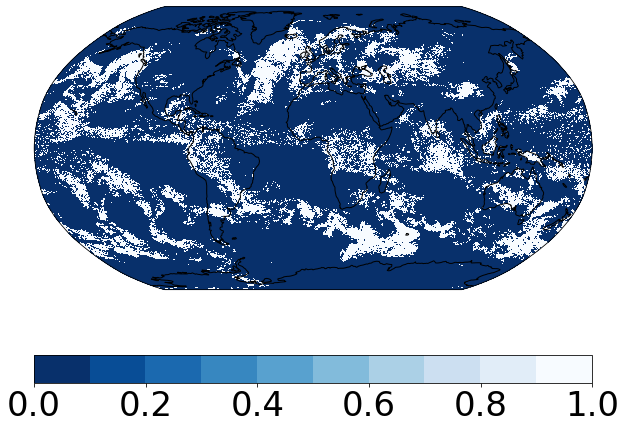

In [4]:
# # Note that the cloud cover scheme used was a 0-1 cloud cover scheme.
# maps = psy.plot.mapplot(os.path.join(path, file_orig), dims = {'name': 'ccl', 'height': 40}, 
#                         projection='robin', cmap='Blues_r', title='Cloud cover on 20041105 at 15:00 (on layer 40)')
# plt.savefig('original_cloud_cover_snapshot.pdf')

# Note that the cloud cover scheme used was a 0-1 cloud cover scheme.
maps = psy.plot.mapplot(os.path.join(path, file_orig), dims = {'name': 'ccl', 'height': 40}, cticksize=34,
                        projection='robin', cmap='Blues_r')
plt.savefig('original_cloud_cover_snapshot_untitled.pdf')

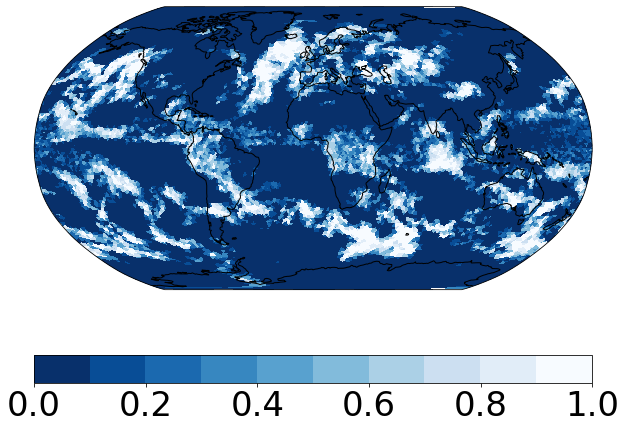

In [49]:
# maps = psy.plot.mapplot(os.path.join(path, file_cg), dims = {'name': 'cl', 'height': 40}, 
#                         projection='robin', cmap='Blues_r', title='Horizontally interpolated cloud cover on 20041105 at 15:00 (on layer 40)')
# plt.savefig('horizontally_coarse_grained_cloud_cover.pdf')

maps = psy.plot.mapplot(os.path.join(path, file_cg), dims = {'name': 'cl', 'height': 40}, cticksize=34,
                        projection='robin', cmap='Blues_r')
# plt.savefig('horizontally_coarse_grained_cloud_cover_untitled.pdf')

Of vertical coarse-graining:

In [4]:
# Some arbitrary horizontal field
rand_field = np.random.randint(20480)
# rand_field = 15252 # To reproduce the profile from the paper
rand_field

15252

In [44]:
## Load original data
# Load zg profile
DS = xr.open_dataset('/pf/b/b309170/my_work/QUBICC/grids/qubicc_l191_zg_ml_0015_R02B04_G.nc')
da = DS.zg.values
zg_hr = da[:, rand_field]
zg_hr = zg_hr[-91:] # Need the 91 earth-bound layers
# Load clc profile
DS = xr.open_dataset('/pf/b/b309170/my_work/QUBICC/data_hor_interp/hc2_02_p1m_cl_ml_20041105T150000Z.nc')
da = DS.cl.values
print(da.shape)
cl_hr = da[0, :, rand_field]

(1, 91, 20480)


In [45]:
## Load vertically coarse-grained data
# Load clc profile
DS = xr.open_dataset('/pf/b/b309170/my_work/QUBICC/data_var_vertinterp/cl/int_var_hc2_02_p1m_cl_ml_20041105T150000Z_R02B04.nc')
da = DS.cl.values
not_nan = ~np.isnan(da[0,:,rand_field])
cl_lr = da[0, not_nan, rand_field]
# Load zg profile
DS = xr.open_dataset('/pf/b/b309170/my_work/QUBICC/data_var_vertinterp/zg/zg_icon-a_capped.nc')
da = DS.zg.values
zg_lr = da[not_nan, rand_field] 

In [46]:
# Increase the general font size
size_plot_elements = 16
matplotlib.rcParams['legend.fontsize'] = size_plot_elements
matplotlib.rcParams['axes.labelsize'] = size_plot_elements # For an axes xlabel and ylabel
matplotlib.rcParams['xtick.labelsize'] = size_plot_elements
matplotlib.rcParams['ytick.labelsize'] = size_plot_elements

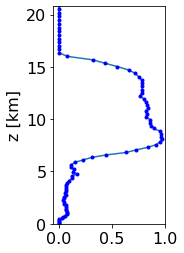

In [50]:
fig = plt.figure(figsize=(2,4))

# # Units in kilometers
# zg_hr = zg_hr/1000
# zg_lr = zg_lr/1000

# ax = fig.add_subplot(211, title='High-res vertical cloud cover profile', ylim=(0, np.max(zg_lr)), xlim=(-0.05,1),
#                     xlabel='Cloud Cover Fraction', ylabel='Mean height of a vertical layer in km')
ax = fig.add_subplot(111, ylim=(0, np.max(zg_lr)), xlim=(-0.05,1), ylabel='z [km]', xticks=[0,0.5,1])
ax.plot(cl_hr, zg_hr)
ax.plot(cl_hr, zg_hr, 'b.')

plt.savefig('vertical_coarse-graining_qubicc_example_v2_1.pdf', bbox_inches='tight')

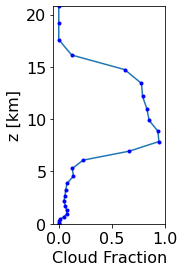

In [53]:
fig = plt.figure(figsize=(2,4))

# ax_2 = fig.add_subplot(212, title='Low-res vertical cloud cover profile', ylim=(0, np.max(zg_lr)), xlim=(-0.05,1),
#                       xlabel='Cloud Cover Fraction', ylabel='Mean height of a vertical layer in km')
ax_2 = fig.add_subplot(111, ylim=(0, np.max(zg_lr)), xlim=(-0.05,1),
                      xlabel='Cloud Fraction', ylabel='z [km]', xticks=[0,0.5,1])
ax_2.plot(cl_lr, zg_lr)
ax_2.plot(cl_lr, zg_lr, 'b.')

plt.savefig('vertical_coarse-graining_qubicc_example_v2_2.pdf', bbox_inches='tight')

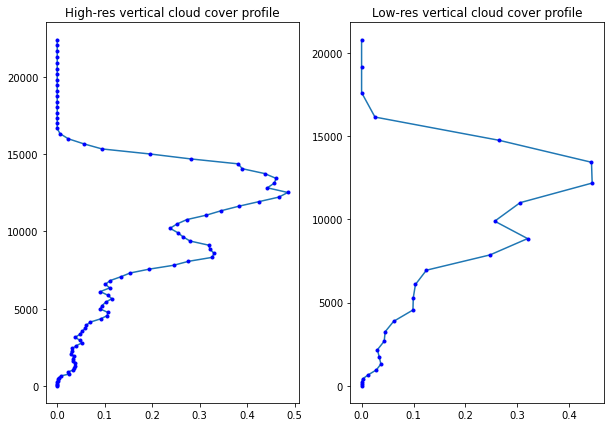

In [70]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(121, title='High-res vertical cloud cover profile')
ax.plot(cl_hr, zg_hr)
ax.plot(cl_hr, zg_hr, 'b.')

ax_2 = fig.add_subplot(122, title='Low-res vertical cloud cover profile')
ax_2.plot(cl_lr, zg_lr)
ax_2.plot(cl_lr, zg_lr, 'b.')